In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/datajasa-dataset/DataInput.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
%matplotlib inline
from scipy import stats

**Load Data**

In [3]:
df0=pd.read_csv('../input/datajasa-dataset/DataInput.csv')
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Emitten                  3 non-null      object 
 1   DER                      3 non-null      float64
 2   Operating Profit Margin  3 non-null      float64
 3   Return on Assets         3 non-null      float64
 4   Sales Growth             3 non-null      float64
 5   Category                 0 non-null      float64
dtypes: float64(5), object(1)
memory usage: 272.0+ bytes


In [4]:
df0.describe()

,DER,Operating Profit Margin,Return on Assets,Sales Growth,Category
count,3.000000e+00,3.000000e+00,3.000000,3.000000,0.0
mean,9.048202e+12,1.194284e+14,-34.184392,0.330193,NaN
std,1.567195e+13,2.068560e+14,89.215214,0.494247,NaN
min,5.448545e-03,-4.581904e+01,-135.437060,-0.014861,NaN
25%,3.421530e-01,-2.290861e+01,-67.717617,0.047089,NaN
50%,6.788575e-01,1.827037e-03,0.001827,0.109040,NaN
75%,1.357230e+13,1.791425e+14,16.441942,0.502719,NaN
max,2.714461e+13,3.582851e+14,32.882056,0.896399,NaN


**Data Clensing**

In [5]:
df0.drop(["Emitten","Category"], axis=1, inplace=True)

**Scatter Plot**

<Figure size 1080x1080 with 0 Axes>

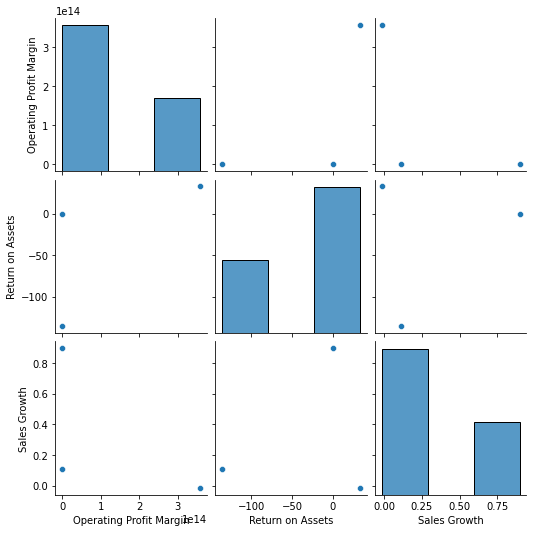

In [6]:
plt.figure(figsize=(15, 15))
sns.pairplot(df0, vars = df0.columns[1:13]);

**Clustering Load Data**

In [7]:
df0 = pd.read_csv('../input/datajasa-dataset/DataInput.csv')
df1 = df0[['DER','Operating Profit Margin','Return on Assets','Sales Growth','Category']]
df1.describe()

,DER,Operating Profit Margin,Return on Assets,Sales Growth,Category
count,3.000000e+00,3.000000e+00,3.000000,3.000000,0.0
mean,9.048202e+12,1.194284e+14,-34.184392,0.330193,NaN
std,1.567195e+13,2.068560e+14,89.215214,0.494247,NaN
min,5.448545e-03,-4.581904e+01,-135.437060,-0.014861,NaN
25%,3.421530e-01,-2.290861e+01,-67.717617,0.047089,NaN
50%,6.788575e-01,1.827037e-03,0.001827,0.109040,NaN
75%,1.357230e+13,1.791425e+14,16.441942,0.502719,NaN
max,2.714461e+13,3.582851e+14,32.882056,0.896399,NaN


<AxesSubplot:xlabel='Emitten', ylabel='Operating Profit Margin'>

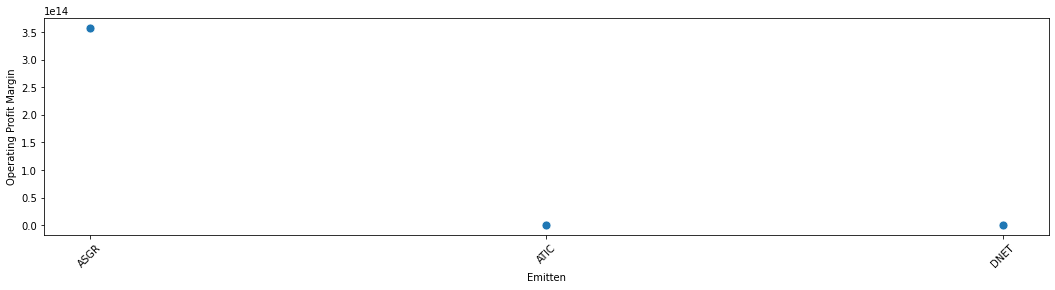

In [8]:
plt.figure(figsize=(18, 4))
plt.xticks(rotation=45)
sns.scatterplot(x='Emitten', y='Operating Profit Margin', 
                data=df0, s=80)

<AxesSubplot:xlabel='Emitten', ylabel='DER'>

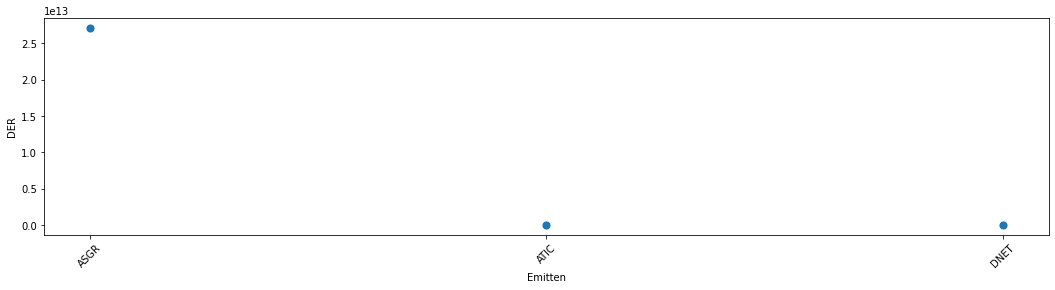

In [9]:
plt.figure(figsize=(18, 4))
plt.xticks(rotation=45)
sns.scatterplot(x='Emitten', y='DER', 
                data=df0, s=80)

<AxesSubplot:xlabel='Emitten', ylabel='Sales Growth'>

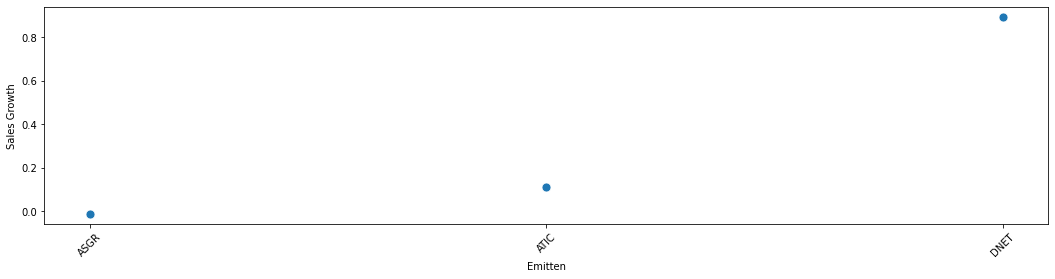

In [10]:
plt.figure(figsize=(18, 4))
plt.xticks(rotation=45)
sns.scatterplot(x='Emitten', y='Sales Growth', 
                data=df0, s=80)

In [11]:
print(f'Jumlah baris sebelum memfilter outlier: {len(df1)}')

filtered_entries = np.array([False] * len(df1))
for col in ['Operating Profit Margin']:
    zscore = abs(stats.zscore(df1[col]))
    filtered_entries = (zscore < 3) | filtered_entries
    
df1 = df1[filtered_entries]

print(f'Jumlah baris setelah memfilter outlier: {len(df1)}')

Jumlah baris sebelum memfilter outlier: 3
Jumlah baris setelah memfilter outlier: 3


In [12]:
df1.describe()

,DER,Operating Profit Margin,Return on Assets,Sales Growth,Category
count,3.000000e+00,3.000000e+00,3.000000,3.000000,0.0
mean,9.048202e+12,1.194284e+14,-34.184392,0.330193,NaN
std,1.567195e+13,2.068560e+14,89.215214,0.494247,NaN
min,5.448545e-03,-4.581904e+01,-135.437060,-0.014861,NaN
25%,3.421530e-01,-2.290861e+01,-67.717617,0.047089,NaN
50%,6.788575e-01,1.827037e-03,0.001827,0.109040,NaN
75%,1.357230e+13,1.791425e+14,16.441942,0.502719,NaN
max,2.714461e+13,3.582851e+14,32.882056,0.896399,NaN


**Standarisasi Fitur**

In [13]:
feats = ['DER','Operating Profit Margin','Sales Growth']
X = df1[feats].values
y = df1['Category'].values

from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)
new_df = pd.DataFrame(data = X_std, columns = feats)
new_df.describe()

,DER,Operating Profit Margin,Sales Growth
count,3.000000e+00,3.000000e+00,3.000000
mean,3.700743e-17,-1.110223e-16,0.000000
std,1.224745e+00,1.224745e+00,1.224745
min,-7.071068e-01,-7.071068e-01,-0.855042
25%,-7.071068e-01,-7.071068e-01,-0.701530
50%,-7.071068e-01,-7.071068e-01,-0.548018
75%,3.535534e-01,3.535534e-01,0.427521
max,1.414214e+00,1.414214e+00,1.403060


In [14]:
from sklearn.cluster import KMeans
wcss=[]

In [15]:
df0.shape

(3, 6)

**K Means**

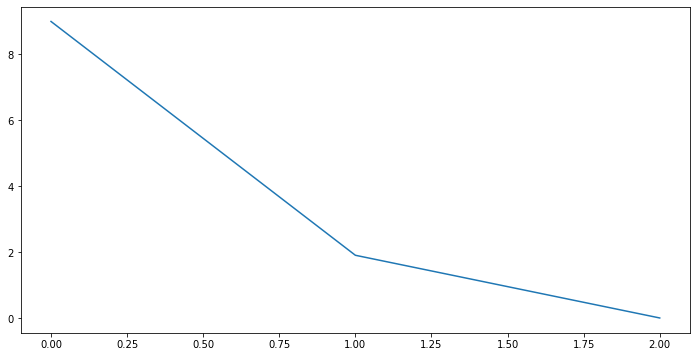

In [16]:
from sklearn.cluster import KMeans
inertia = []

for i in range(1, 4):
  kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
  kmeans.fit(new_df.values)
  inertia.append(kmeans.inertia_)

plt.figure(figsize=(12, 6))
plt.plot(inertia) #Elbow Method

**Memilih Jumlah Cluster**

In [17]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=1, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(new_df.values)

KMeans(n_clusters=1, random_state=0)

In [18]:
new_df['target'] = y
new_df['fit'] = kmeans.labels_

**Plot Cluster**

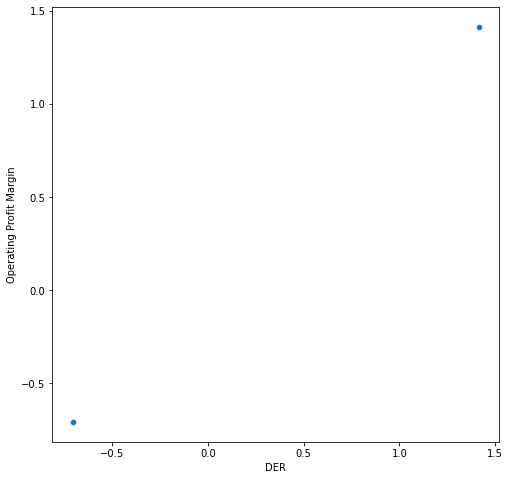

In [19]:
plt.rcParams["figure.figsize"] = (8, 8)
sns.scatterplot(x='DER', y='Operating Profit Margin', hue=new_df.target.to_list(), data=new_df);

In [20]:
new_df.head(5)

,DER,Operating Profit Margin,Sales Growth,target,fit
0,1.414214,1.414214,-0.855042,NaN,0
1,-0.707107,-0.707107,-0.548018,NaN,0
2,-0.707107,-0.707107,1.403060,NaN,0


In [21]:
new_df.insert(0,"Category",np.nan,True)
new_df.loc[new_df['fit'] == 0, 'Category'] = 2
new_df.loc[new_df['fit'] == 1, 'Category'] = 4
new_df.loc[new_df['fit'] == 2, 'Category'] = 1
new_df.loc[new_df['fit'] == 3, 'Category'] = 0
new_df.loc[new_df['fit'] == 4, 'Category'] = 3
new_df['Category'] = new_df['Category'].astype(int)
new_df.head(5)

,Category,DER,Operating Profit Margin,Sales Growth,target,fit
0,2,1.414214,1.414214,-0.855042,NaN,0
1,2,-0.707107,-0.707107,-0.548018,NaN,0
2,2,-0.707107,-0.707107,1.403060,NaN,0


In [22]:
new_df.drop(["fit","target"], axis=1, inplace=True)
new_df.columns = ['Category','DER (St.)','Operating Profit Margin (St.)', 'Sales Growth (St.)']
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 4 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Category                       3 non-null      int64  
 1   DER (St.)                      3 non-null      float64
 2   Operating Profit Margin (St.)  3 non-null      float64
 3   Sales Growth (St.)             3 non-null      float64
dtypes: float64(3), int64(1)
memory usage: 224.0 bytes


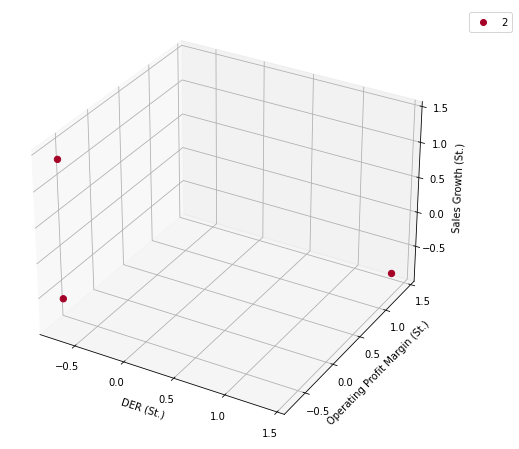

In [23]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')


x = new_df['DER (St.)']
y = new_df['Operating Profit Margin (St.)']
z = new_df['Sales Growth (St.)']

ax.set_xlabel("DER (St.)")
ax.set_ylabel("Operating Profit Margin (St.)")
ax.set_zlabel("Sales Growth (St.)")

cmap = ListedColormap(sns.color_palette("RdYlGn", 256).as_hex())

sc = ax.scatter(x, y, z, s=40, c=new_df['Category'], marker='o', cmap=cmap, alpha=1)
plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)

plt.show()

**Melihat X dan Y**

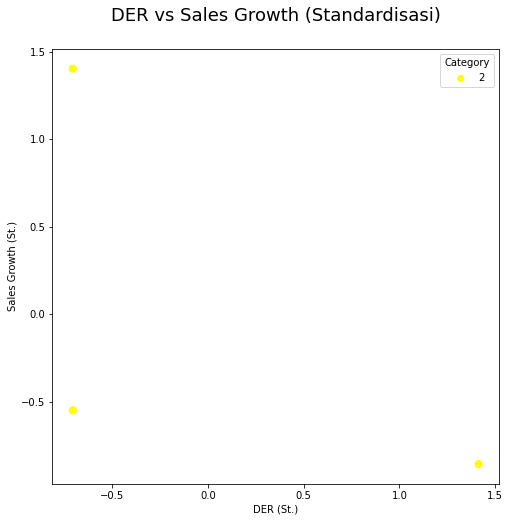

In [24]:
# color palette as dictionary
palette = {0:"tab:red",
           1:"tab:orange", 
           2:"yellow",
           3:"lime",
           4:"darkgreen"}

sns.scatterplot(x='DER (St.)', y='Sales Growth (St.)', 
                hue='Category', data=new_df, s=80,
                palette=palette)
plt.title("DER vs Sales Growth (Standardisasi)", fontsize=18, y=1.05)
plt.show()

**Melihat Y dan Z**

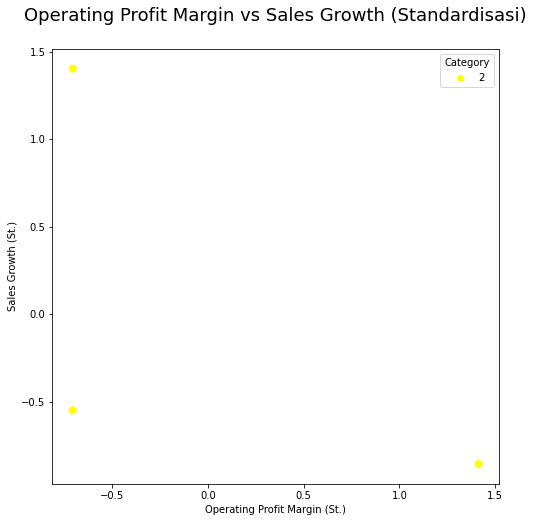

In [25]:
sns.scatterplot(x='Operating Profit Margin (St.)', y='Sales Growth (St.)', 
                hue='Category', data=new_df, s=80,
                palette=palette)
plt.title("Operating Profit Margin vs Sales Growth (Standardisasi)", fontsize=18, y=1.05)
plt.show()

**X dan Y**

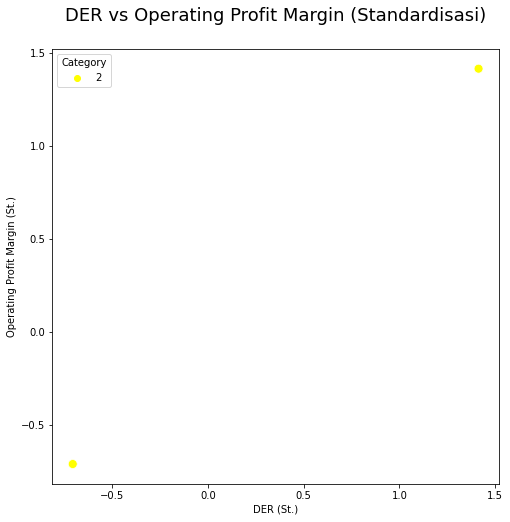

In [26]:
sns.scatterplot(x='DER (St.)', y='Operating Profit Margin (St.)', 
                hue='Category', data=new_df, s=80,
                palette=palette)
plt.title("DER vs Operating Profit Margin (Standardisasi)", fontsize=18, y=1.05)
plt.show()

**Export Result**

In [27]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Emitten                  3 non-null      object 
 1   DER                      3 non-null      float64
 2   Operating Profit Margin  3 non-null      float64
 3   Return on Assets         3 non-null      float64
 4   Sales Growth             3 non-null      float64
 5   Category                 0 non-null      float64
dtypes: float64(5), object(1)
memory usage: 272.0+ bytes


In [28]:
# drop these row indexes
# from dataFrame
index_names = df0[ df0['Emitten'] == 'ARTO' ].index
df0.drop(index_names, inplace = True)
df0.reset_index(drop=True, inplace=True)
df0.drop(["Category",
         ], axis=1, inplace=True)

In [29]:
dftemp = pd.read_csv('../input/datajasa-dataset/DataInput.csv')
df = pd.concat([dftemp, new_df, df0], axis=1)
df.head(5)

,Emitten,DER,Operating Profit Margin,Return on Assets,Sales Growth,Category,Category,DER (St.),Operating Profit Margin (St.),Sales Growth (St.),Emitten,DER,Operating Profit Margin,Return on Assets,Sales Growth
0,ASGR,2.714461e+13,3.582851e+14,32.882056,-0.014861,NaN,2,1.414214,1.414214,-0.855042,ASGR,2.714461e+13,3.582851e+14,32.882056,-0.014861
1,ATIC,5.448545e-03,-4.581904e+01,-135.437060,0.109040,NaN,2,-0.707107,-0.707107,-0.548018,ATIC,5.448545e-03,-4.581904e+01,-135.437060,0.109040
2,DNET,6.788575e-01,1.827037e-03,0.001827,0.896399,NaN,2,-0.707107,-0.707107,1.403060,DNET,6.788575e-01,1.827037e-03,0.001827,0.896399


In [30]:
df.to_csv('DataInput.csv', index = False)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Emitten                        3 non-null      object 
 1   DER                            3 non-null      float64
 2   Operating Profit Margin        3 non-null      float64
 3   Return on Assets               3 non-null      float64
 4   Sales Growth                   3 non-null      float64
 5   Category                       0 non-null      float64
 6   Category                       3 non-null      int64  
 7   DER (St.)                      3 non-null      float64
 8   Operating Profit Margin (St.)  3 non-null      float64
 9   Sales Growth (St.)             3 non-null      float64
 10  Emitten                        3 non-null      object 
 11  DER                            3 non-null      float64
 12  Operating Profit Margin        3 non-null      float64

**Get Centroid**

In [32]:
kmeans.cluster_centers_

array([[ 7.40148683e-17, -1.48029737e-16,  0.00000000e+00]])

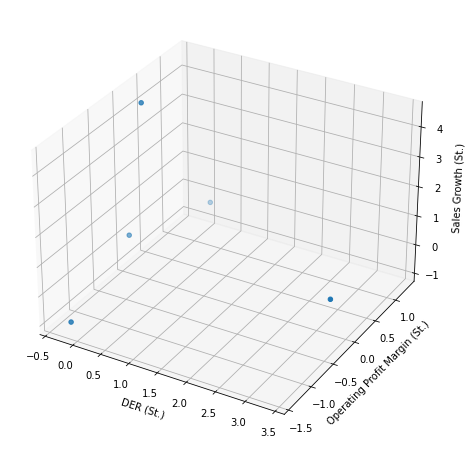

In [33]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
x = [0.07796577,3.3825386,-0.19978728,-0.22183117,-0.32525515]
y = [1.27721216,-0.22442569,-1.39490532,0.15549501,-0.03911061]
z = [-0.22773712,0.35006475,-0.89274149,4.44060221,0.14030381]

ax.set_xlabel("DER (St.)")
ax.set_ylabel("Operating Profit Margin (St.)")
ax.set_zlabel("Sales Growth (St.)")
ax.scatter(x, y, z)
plt.show()